# **Modelling and Evaluation**

## Objectives

* Answer Business Requirement 2:
    * The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## Inputs

* /workspace/mildew-detection-in-cherry-leaves/inputs/datasets/raw/cherry-leaves/train
* /workspace/mildew-detection-in-cherry-leaves/inputs/datasets/raw/cherry-leaves/validation
* /workspace/mildew-detection-in-cherry-leaves/inputs/datasets/raw/cherry-leaves/test
* image shape embeddings.

## Outputs

* Images distribution plot in train, validation and test sets.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on a random image file.

## Additional Comments | Insights | Conclusions


---



---

# Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.image import imread

---

### Set working directory

In [2]:
cwd = os.getcwd()

In [3]:
os.chdir(os.path.dirname(cwd))
print("You set a new current directory")

You set a new current directory


In [4]:
working_dir = os.getcwd()
working_dir

'/workspace/mildew-detection-in-cherry-leaves'

---

### Set input directories

Set train, validation and test paths

In [5]:
my_data_dir = 'inputs/datasets/raw/cherry-leaves'
train_path = os.path.join(my_data_dir, 'train')
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

### Set output directory

In [6]:
version = 'v1'
file_path = os.path.join('outputs', version)

if 'outputs' in os.listdir(working_dir) and version in os.listdir(os.path.join(working_dir, 'outputs')):
    print('Old version is already available. Create a new version')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available. Create a new version


### Set label names

In [7]:
labels = os.listdir(train_path)
print('Labels for the images are', labels)

Labels for the images are ['healthy', 'powdery_mildew']


### Set image shape

In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

## Images Distribution in Train, Validation and Test datasets

### Image Distribution Bar Figure

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




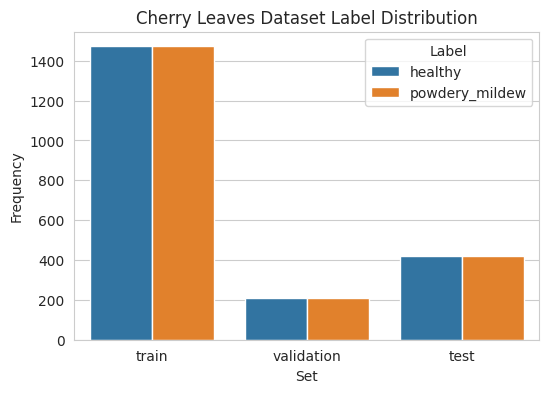

In [9]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(os.path.join(my_data_dir, folder, label))))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(os.path.join(my_data_dir, folder, label)))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
plt.title('Cherry Leaves Dataset Label Distribution')
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Image Distribution Pie Figure

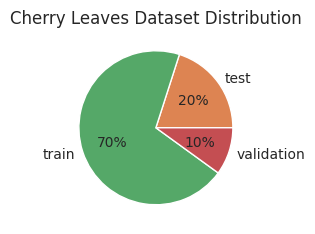

In [10]:
folders = os.listdir(my_data_dir)
data = []

# Iterating through folders and labels
for folder in folders:
    n = 0  # Initialize count
    for label in labels:
        # Get the number of files in each subdirectory
        n += len(os.listdir(os.path.join(my_data_dir, folder, label)))
    data.append(n)

# Plotting the pie chart
px = 1 / plt.rcParams['figure.dpi']
plt.subplots(figsize=(800 * px, 250 * px))
colors = sns.color_palette('deep')[1:6]
plt.pie(data, labels=folders, colors=colors, autopct='%.0f%%')
plt.title('Cherry Leaves Dataset Distribution')
plt.savefig(f'{file_path}/sets_distribution_pie.png', bbox_inches='tight', dpi=150)
plt.show()


---

## Image Data Augmentation

### ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* ### Initialise ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

* ### Augment training image dataset

In [13]:
BATCH_SIZE = 16 # set batch size

train_data = augmented_image_data.flow_from_directory(train_path,
                                                      target_size=image_shape[:2],
                                                      color_mode='rgb',
                                                      batch_size=BATCH_SIZE,
                                                      class_mode='binary',
                                                      shuffle=True
                                                      )

train_data.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment validation image dataset

In [14]:
validation_data = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                         target_size=image_shape[:2],
                                                                         color_mode='rgb',
                                                                         batch_size=BATCH_SIZE,
                                                                         class_mode='binary',
                                                                         shuffle=False
                                                                         )

Found 420 images belonging to 2 classes.


* ### Augment test image dataset

In [15]:
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                   target_size=image_shape[:2],
                                                                   color_mode='rgb',
                                                                   batch_size=BATCH_SIZE,
                                                                   class_mode='binary',
                                                                   shuffle=False
                                                                   )

Found 844 images belonging to 2 classes.


* ### Plot augmented training image

(16, 256, 256, 3)


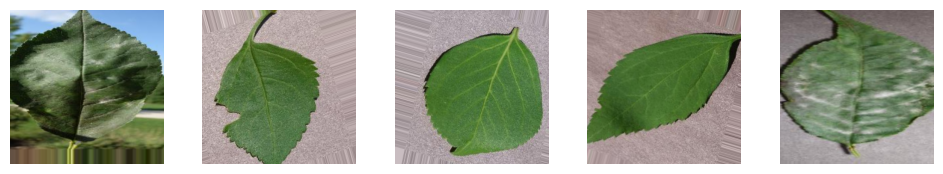

In [16]:
# Plot train_data images
fig, axs = plt.subplots(1, 5, figsize=(12, 2))

img, label = train_data.next()
print(img.shape)  # (1, 256, 256, 3)

for i in range(5):
    img, label = train_data.next()
    axs[i].imshow(img[0])
    axs[i].axis('off')  # Remove axis for better visualization

plt.show()

* ### Plot augmented validation and test images

(16, 256, 256, 3)


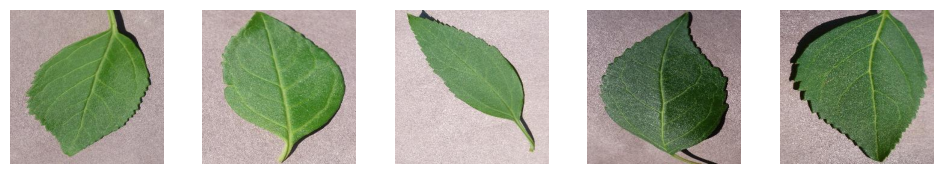

In [17]:
# Plot validation_data images
fig, axs = plt.subplots(1, 5, figsize=(12, 2))

img, label = validation_data.next()
print(img.shape)  # (1, 256, 256, 3)

for i in range(5):
    img, label = validation_data.next()
    axs[i].imshow(img[0])
    axs[i].axis('off')  # Remove axis for better visualization

plt.show()

(16, 256, 256, 3)


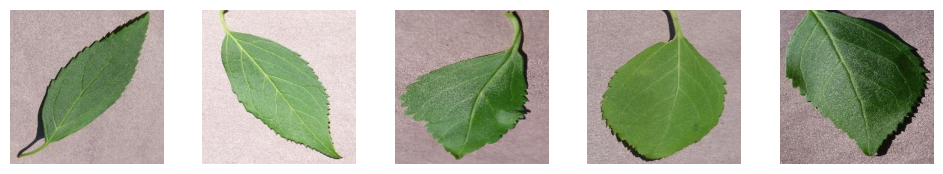

In [18]:
# Plot test_data images
fig, axs = plt.subplots(1, 5, figsize=(12, 2))

img, label = test_data.next()
print(img.shape)  # (1, 256, 256, 3)

for i in range(5):
    img, label = test_data.next()
    axs[i].imshow(img[0])
    axs[i].axis('off')  # Remove axis for better visualization

plt.show()

### Save class_indices

In [19]:
joblib.dump(value=train_data.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Model Creation

---

## ML model

* ### Import model packages


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2

* ### Model

In [21]:
def create_tf_model():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(filters=32, kernel_size=(3, 3),
                     input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3),
                     input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3),
                     input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])
    
    return model

* ### Model Summary

In [22]:
create_tf_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

2024-09-21 07:24:56.227161: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* ### Early Stopping

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


### Fit model for model training

In [24]:
model = create_tf_model()
model.fit(train_data,
          epochs=25,
          steps_per_epoch=len(train_data.classes) // BATCH_SIZE,
          validation_data=validation_data,
          callbacks=[early_stop, reduce_lr],
          verbose=1
          )

2024-09-21 07:25:01.902218: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
184/184 [==============================] - 309s 2s/step - loss: 0.6555 - accuracy: 0.7211 - val_loss: 0.1882 - val_accuracy: 0.9690
Epoch 2/25
184/184 [==============================] - 301s 2s/step - loss: 0.3015 - accuracy: 0.9239 - val_loss: 0.1675 - val_accuracy: 0.9810
Epoch 3/25
184/184 [==============================] - 294s 2s/step - loss: 0.2456 - accuracy: 0.9490 - val_loss: 0.1198 - val_accuracy: 0.9881
Epoch 4/25
184/184 [==============================] - 297s 2s/step - loss: 0.1979 - accuracy: 0.9616 - val_loss: 0.0853 - val_accuracy: 0.9881
Epoch 5/25
184/184 [==============================] - 301s 2s/step - loss: 0.1701 - accuracy: 0.9749 - val_loss: 0.2956 - val_accuracy: 0.9810
Epoch 6/25
184/184 [==============================] - 302s 2s/step - loss: 0.2015 - accuracy: 0.9664 - val_loss: 0.6360 - val_accuracy: 0.8595
Epoch 7/25
184/184 [==============================] - 296s 2s/step - loss: 0.0751 - accuracy: 0.9857 - val_loss: 0.0679 - val_accuracy: 0.9881

### Save model

In [44]:
model.save('outputs/v1/mildew_detection_model.h5')

---

## Model Performance

---

### Model Learning Curve

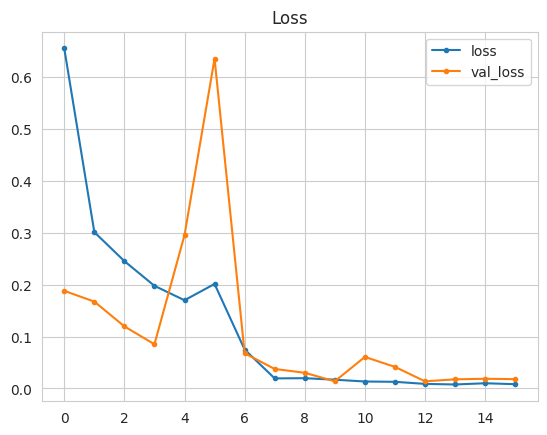

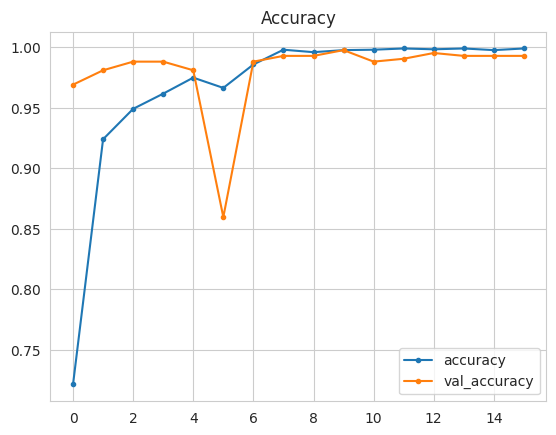

In [25]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_accuracy.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
